In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from src import settings
from src.utils import fileio, data_utils

INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "0_0_preproc_data")

trials = fileio.load_multiple_folders(INPUT_DIR)

pos_x_treatment = np.array([])
pos_y_treatment = np.array([])
for group_nape, group_path in trials.items():  
    pos_x_group = np.array([])
    pos_y_group = np.array([])
    
    fly_dict=fileio.load_files_from_folder(group_path)
    for fly_name, fly_path in fly_dict.items():  
        df = pd.read_csv(fly_path, usecols=['pos x', 'pos y'])
        pos_x = df["pos x"].to_numpy()
        pos_y = df["pos y"].to_numpy()

        pos_x_group = np.concatenate((pos_x_group, pos_x))
        pos_y_group = np.concatenate((pos_y_group, pos_y))

        pos_x_treatment = np.concatenate((pos_x_treatment, pos_x))
        pos_y_treatment = np.concatenate((pos_y_treatment, pos_y))

x_values_filtered = pos_x_treatment[~np.isnan(pos_x_treatment)]
y_values_filtered = pos_y_treatment[~np.isnan(pos_y_treatment)]

/tmp/ipykernel_181430/4195821136.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


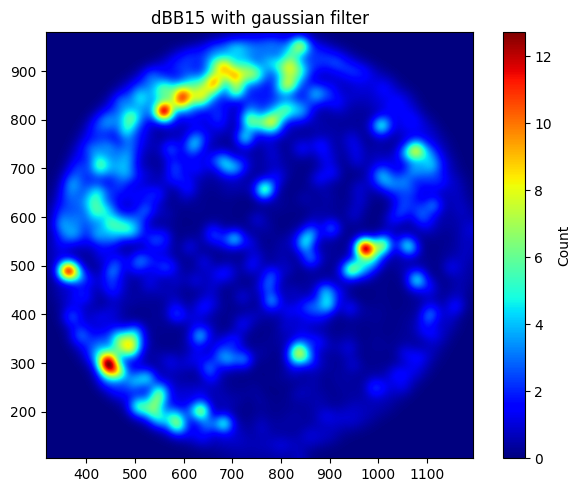

In [37]:
# Create a 2D histogram using the x and y values
heatmap, xedges, yedges = np.histogram2d(x_values_filtered, y_values_filtered, bins=1000)
heatmap = gaussian_filter(heatmap, sigma=16)
# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=cm.jet)
plt.colorbar(label='Count')
# plt.xlabel('X values')
# plt.ylabel('Y values')

fig.set_size_inches(7, 7)
plt.tight_layout()
plt.title(f'{settings.TREATMENT} with gaussian filter')
plt.show()

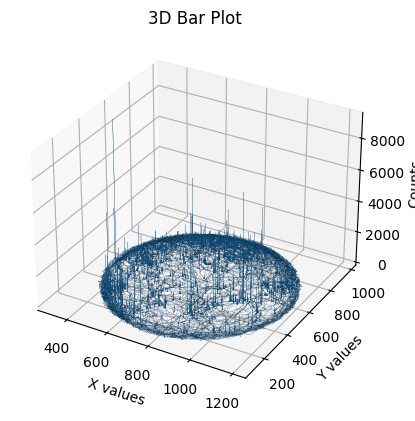

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_values = x_values_filtered
y_values = y_values_filtered

counts = {}
for x, y in zip(x_values, y_values):
    coordinate_pair = (x, y)
    if coordinate_pair in counts:
        counts[coordinate_pair] += 1
    else:
        counts[coordinate_pair] = 1

unique_coordinates = list(counts.keys())
counts_values = list(counts.values())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = zip(*unique_coordinates)
ax.bar3d(x, y, np.zeros_like(counts_values), 0.8, 0.8, counts_values, shade=True)

ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Counts')
ax.set_title('3D Bar Plot')

plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_values = pos_x_group
y_values = pos_y_group

# Compute counts for each coordinate pair
counts = {}
for x, y in zip(x_values, y_values):
    coordinate_pair = (x, y)
    if coordinate_pair in counts:
        counts[coordinate_pair] += 1
    else:
        counts[coordinate_pair] = 1

# Extract the unique x, y pairs and their counts
unique_coordinates = list(counts.keys())
counts_values = np.array(list(counts.values()))

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = cm.jet(counts_values / np.max(counts_values))

# Plot the bars with heights based on counts
x, y = zip(*unique_coordinates)
z = np.zeros_like(counts_values)
dx = dy = 0.8
dz = counts_values

for i in range(len(unique_coordinates)):
    ax.bar3d(x[i], y[i], z[i], dx, dy, dz[i], color=colors[i])

# Set labels and title
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Counts')
ax.set_title('3D Bar Plot')
# Show the plot
plt.show()
